Organisation :Bharat Intern

Presented By:
    
         Sony Sinha
         Machine Learning Intern
        

Task 3

Predict the different species of flowers on lenght of their petals and sepals

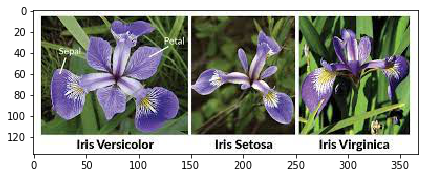

In [1]:
from skimage import io
image =io.imread("C:/Users/nawin/Downloads/iris_flower.jfif")
io.imshow(image)

In [2]:
##  importing libraries

# Reading the data
import pandas as pd
import numpy as np

# Visualization the data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])

In [4]:
# Printing the first five rows of dataset
data.head()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Printing the last five rows of dataset
data.tail()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Printing the number of rows and columns 
print("The number of rows and columns respectively are",data.shape)

The number of rows and columns respectively are (150, 5)


In [7]:
# Printing the name of columns/attributes
print("The number of rows and columns respectively are",data.columns)

The number of rows and columns respectively are Index(['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species_Flower'],
      dtype='object')


In [8]:
# Information of Dataset
data.info

<bound method DataFrame.info of      Sepal_Length_in_cm  Sepal_Width_in_cm  Petal_Length_in_cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     Petal_Width_in_cm  Species_Flower  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3          

In [9]:
# Finding the missing values 
data.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species_Flower        0
dtype: int64

In [10]:
# Finding duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [11]:
# Printing the datatype of attributes
print(" The datatype of attributes are \n",data.dtypes)

 The datatype of attributes are 
 Sepal_Length_in_cm    float64
Sepal_Width_in_cm     float64
Petal_Length_in_cm    float64
Petal_Width_in_cm     float64
Species_Flower         object
dtype: object


In [12]:
# Fetching unique values of Species
data['Species_Flower'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# Statistical Analysis 
print("The statistical analysis:\n",data.describe().T)

The statistical analysis:
                     count      mean       std  min  25%   50%  75%  max
Sepal_Length_in_cm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
Sepal_Width_in_cm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
Petal_Length_in_cm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
Petal_Width_in_cm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


Data Visualization

In [15]:
# Univariate Analysis

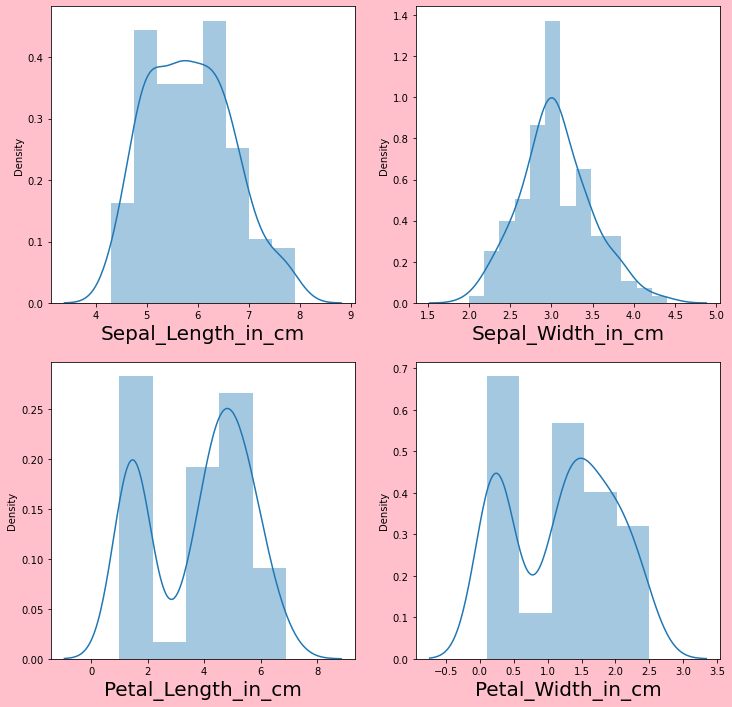

In [16]:
## Distribution of data
plt.figure(figsize=(12,12),facecolor='pink')
columnnumber=1

for column in data:
    if columnnumber<=4:
        ax=plt.subplot(2,2,columnnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    columnnumber+=1
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1df50d36d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1df50d46340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df510588b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df50d468e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df50d46bb0>],
 'means': []}

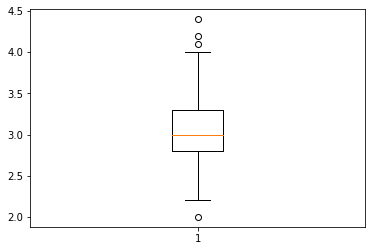

In [17]:
## Boxplot
plt.boxplot(data['Sepal_Width_in_cm'])
# Observation: upper outliers and lower outlier detected 

{'whiskers': [<matplotlib.lines.Line2D at 0x1df50d8cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x1df50d99520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df50d8cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x1df50d99ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df50d99d90>],
 'means': []}

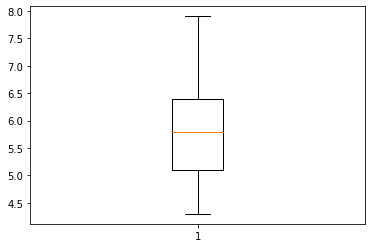

In [18]:
## Boxplot
plt.boxplot(data['Sepal_Length_in_cm'])
# Observation: no outlier detected 

{'whiskers': [<matplotlib.lines.Line2D at 0x1df50df4dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df50e023a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df50df4af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df50e02940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df50e02c40>],
 'means': []}

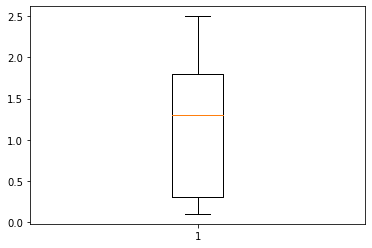

In [19]:
## Boxplot
plt.boxplot(data['Petal_Width_in_cm'])
# Observation: no outlier detected 

{'whiskers': [<matplotlib.lines.Line2D at 0x1df50e66100>,
 'caps': [<matplotlib.lines.Line2D at 0x1df50e666a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df50e57dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df50e66c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df50e66f10>],
 'means': []}

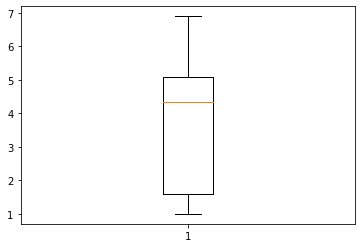

In [20]:
## Boxplot
plt.boxplot(data['Petal_Length_in_cm'])
# Observation: no outlier detected 

<AxesSubplot:xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

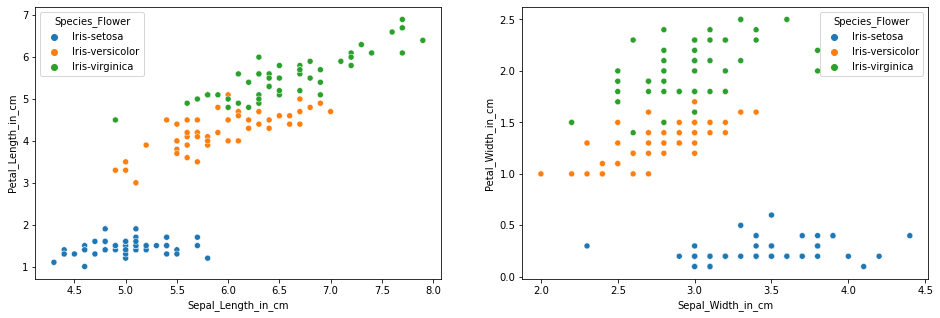

In [21]:
## Bivariate Analysis

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=data,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=data,hue='Species_Flower',ax=ax2)

<AxesSubplot:>

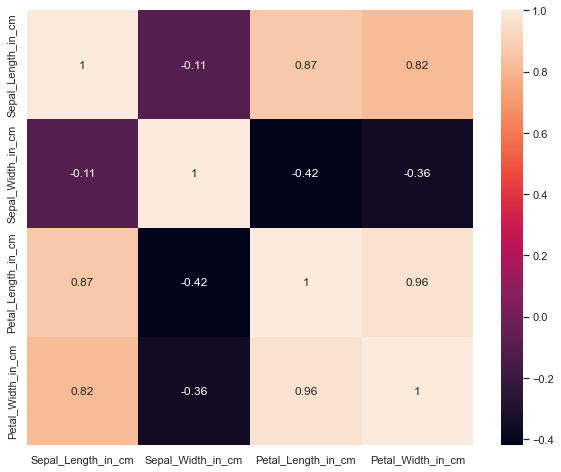

In [22]:
# Multivariate Analysis
# HeatMap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(),annot=True)

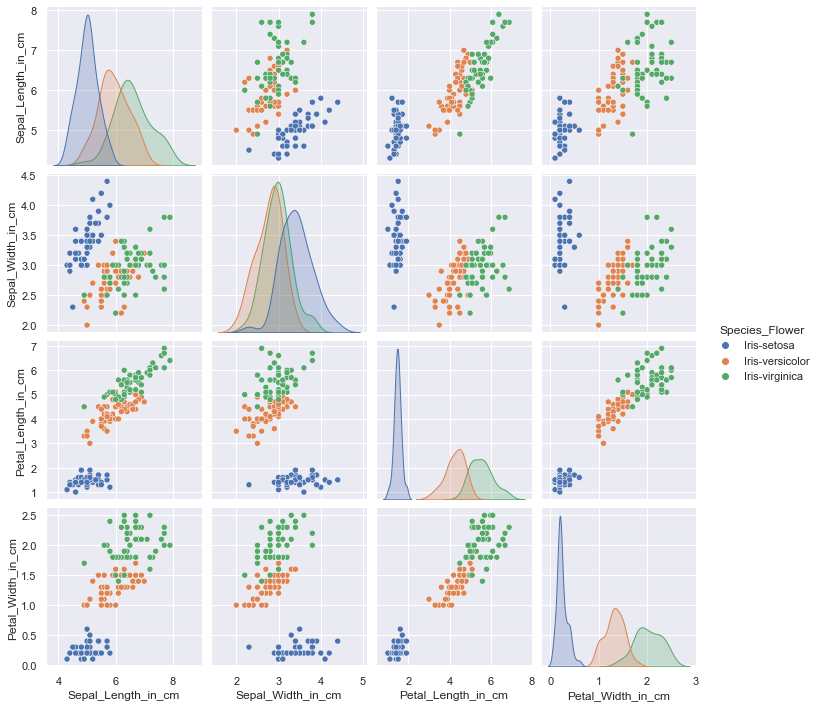

In [23]:
sns.pairplot(data,hue="Species_Flower")

In [24]:
## Encoding
le = LabelEncoder()
data['Species_Flower'] = le.fit_transform = (data['Species_Flower'])
data.head()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
## Independent Features
X = data.drop(columns=['Species_Flower'])
X

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
## Independent Feature
y = data['Species_Flower']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species_Flower, Length: 150, dtype: object

In [27]:
## Splitting the model
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

In [28]:
## Training the model
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [29]:
## printing coefficient of model
print(log_reg.coef_)

[[-0.48763783  0.78851848 -2.3256925  -0.95178978]
 [ 0.39258081 -0.1589235  -0.19497721 -0.71315472]
 [ 0.09505702 -0.62959498  2.52066971  1.6649445 ]]


In [30]:
## printing intercept of model
print(log_reg.intercept_)

[  9.90170624   2.05406341 -11.95576965]


In [31]:
## Printing Training Score
print('Training Score:',log_reg.score(X_train,y_train))

Training Score: 0.9809523809523809


In [32]:
## Printing Test Score
print('Test Score:',log_reg.score(X_test,y_test))

Test Score: 0.9555555555555556


In [33]:
## predicting for test data
y_pred =log_reg.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [34]:
## Creating Dataframe predictions
predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
40,Iris-setosa,Iris-setosa
82,Iris-versicolor,Iris-versicolor
92,Iris-versicolor,Iris-versicolor
26,Iris-setosa,Iris-setosa
10,Iris-setosa,Iris-setosa
101,Iris-virginica,Iris-virginica
138,Iris-virginica,Iris-virginica
144,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
12,Iris-setosa,Iris-setosa


In [35]:
## confusion matrix

conf_matrix= confusion_matrix(y_test,y_pred)
conf_matrix

array([[15,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 12]], dtype=int64)

In [36]:
## Computing Accuracy
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.9555555555555556

In [37]:
## Computing False positive
False_positive =conf_matrix[0][1]
False_positive

0

In [38]:
## Computing True Negative
True_negative=conf_matrix[1][1]
True_negative

16

In [39]:
## Computing True positive
True_positive=conf_matrix[0][0]
True_positive

15

In [40]:
## Computing Precision
Precision= True_positive/(True_positive+False_positive)
Precision

1.0

In [41]:
## Computing False negative
False_negative =conf_matrix[1][0]
False_negative

0

In [42]:
## Computing Recall
Recall= True_positive/(True_positive+False_negative)
Recall

1.0

In [43]:
## Computing F1 Score
f1_Score=2*(Precision*Recall)/(Recall+Precision)

In [44]:
## Printing Classification Report
Classification_Report= classification_report(y_test,y_pred)
print(Classification_Report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



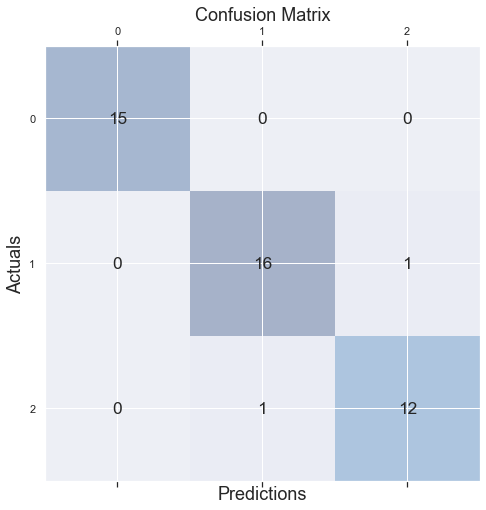

In [45]:
## Plotting Confusion Matrix
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i,j],va='center',ha='center',size='x-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [46]:
print("The accuracy of the model:",accuracy)

The accuracy of the model: 0.9555555555555556
